# KICKSTARTER - group 6

To Do's: 

1. Business Problem to ML Problem
2. Exploratory Analysis
3. ML Model

## Data Cleaning

Import the dataset:

In [2]:
import pandas as pd
import numpy as np
import os
import datetime


Merge all the csv files to have all the data together.

In [3]:
files = [file for file in os.listdir('Kickstarter_Dataset')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Kickstarter_Dataset/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv("Kickstarter_Complete.csv", index = False)

Import the complete dataset.

In [4]:
df = pd.read_csv("Kickstarter_Complete.csv")

df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,210,Believing Heart Tarot is a one of a kind addit...,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",14166,US,1513372142,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,$,True,...,believing-heart-tarot-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1522555142,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,international
1,3,Be a part of Street Art Magic and have a hand ...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",42,US,1390444485,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,$,True,...,zone-7-street-arts-initiative,https://www.kickstarter.com/discover/categorie...,False,False,failed,1392323039,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,international
2,31,My writing changed after my daughter was kille...,"{""id"":359,""name"":""Print"",""slug"":""journalism/pr...",1127,US,1404688773,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,$,True,...,loving-becca-journey-of-child-loss,https://www.kickstarter.com/discover/categorie...,True,False,successful,1407702831,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,international
3,4,The Sweet Botanist's natural syrups are made s...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",105,US,1464156479,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,$,True,...,the-sweet-botanist-syrup-co,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466802580,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,international
4,800,The digital restoration of the classic 1968 Ro...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",28720,US,1331149074,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,$,True,...,el-capitan-film-restoration,https://www.kickstarter.com/discover/categorie...,True,False,successful,1351739753,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,international


In [9]:
df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

## Data Cleaning

#### Columns to delete.

We decided to delete the following columns: currency_symbol, id, photo, permissions(276), friends(274), source_url, is_backing (276), is_starred (276). 

In [10]:
del df['currency_symbol']
del df['id']
del df['photo']
del df['permissions']
del df['friends']
del df['source_url']
del df['is_backing']
del df['is_starred']

#### Rename backers_count into nr_backers.
backers_count shows the number of backers for that project.

In [11]:
df=df.rename(columns={"backers_count":"nr_backers"})

#### Create 3 new columns from the category column: category, subcategory and category_id.

In [12]:
df=df.rename(columns={"category":"Category"})

In [13]:
df['category'] = df['Category'].apply(lambda x: x.split('"slug":"')[1].split('/')[0])
df['category'] = df['category'].apply(lambda x: x.split('"')[0])
df['subcategory'] = df['Category'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['subcategory_id'] = df['Category'].apply(lambda x: x.split('"id":')[1].split(',')[0])

In [14]:
del df['Category']

#### Modify the date time columns.

In [15]:
df['created_at'] = pd.to_datetime(df['created_at'], unit="s").dt.date
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit="s").dt.date
df['deadline'] = pd.to_datetime(df['deadline'], unit="s").dt.date
df['launched_at'] = pd.to_datetime(df['launched_at'], unit="s").dt.date

In [16]:
df.head()

,nr_backers,blurb,converted_pledged_amount,country,created_at,creator,currency,currency_trailing_code,current_currency,deadline,...,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,category,subcategory,subcategory_id
0,210,Believing Heart Tarot is a one of a kind addit...,14166,US,2017-12-15,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,True,USD,2018-04-01,...,False,successful,2018-04-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,international,art,Digital Art,21
1,3,Be a part of Street Art Magic and have a hand ...,42,US,2014-01-23,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,True,USD,2014-02-13,...,False,failed,2014-02-13,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,international,art,Public Art,53
2,31,My writing changed after my daughter was kille...,1127,US,2014-07-06,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,True,USD,2014-08-10,...,False,successful,2014-08-10,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,international,journalism,Print,359
3,4,The Sweet Botanist's natural syrups are made s...,105,US,2016-05-25,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,True,USD,2016-06-24,...,False,failed,2016-06-24,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,international,food,Drinks,307
4,800,The digital restoration of the classic 1968 Ro...,28720,US,2012-03-07,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,True,USD,2012-11-01,...,False,successful,2012-11-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,international,film & video,Documentary,30


#### Create 4 new columns from the creator one: creator_id, creator_name, is_registered.

In [17]:
df['creator_id'] = df['creator'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['creator_name'] = df['creator'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['is_creator_registered'] = df['creator'].apply(lambda x: x.split('"is_registered":')[1].split(',')[0])

In [18]:
del df['creator']

#### Create 2 new columns from the location one: city and state.

In [19]:
df['nation'] = df['location'].astype(str).apply(lambda x: x.split('"state":"')[1].split('"')[0] if len(x.split('"state":"'))>1 else x.split('-')[0])
df['city'] = df['location'].astype(str).apply(lambda x: x.split('"name":"')[1].split('"')[0] if len(x.split('"name":"'))>1 else x.split('-')[0])

In [20]:
del df['location']

#### Create 2 columns from the profile one: project_id and project_status.

In [21]:
df['project_id'] = df['profile'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['project_status'] = df['profile'].apply(lambda x: x.split('"state":"')[1].split('"')[0])

In [22]:
del df['profile']

#### Modify the urls column.

In [23]:
df['url'] = df['urls'].apply(lambda x: x.split('"project":"')[1].split('"')[0])

In [24]:
del df['urls']

#### Ordering the columns.

In [25]:
df = df[['project_id', 'state', 'name', 'slug', 'blurb', 'url', 'category', 'subcategory','subcategory_id', 
         'creator_id', 'creator_name', 'is_creator_registered', 'country', 'nation', 'city', 'created_at', 
         'launched_at','deadline', 'nr_backers', 'goal', 'pledged', 'currency', 'usd_pledged', 'current_currency', 
         'fx_rate', 'static_usd_rate', 'currency_trailing_code', 'usd_type', 'project_status', 'state_changed_at',  
         'disable_communication', 'is_starrable', 'spotlight', 'staff_pick' ]]

In [26]:
df.to_csv("Cleaned_Kickstarter.csv", index = False)

In [27]:
df.dtypes

project_id                 object
state                      object
name                       object
slug                       object
blurb                      object
url                        object
category                   object
subcategory                object
subcategory_id             object
creator_id                 object
creator_name               object
is_creator_registered      object
country                    object
nation                     object
city                       object
created_at                 object
launched_at                object
deadline                   object
nr_backers                  int64
goal                      float64
pledged                   float64
currency                   object
usd_pledged               float64
current_currency           object
fx_rate                   float64
static_usd_rate           float64
currency_trailing_code       bool
usd_type                   object
project_status             object
state_changed_

#### Description of our final variables

- project_id: id of the project.
- state: status of the project (successful, failed, canceled, live, suspended)
- name: name of the project.
- slug: nickname of the project.
- blurb: description of what’s the project about.
- url: url of the project.
- category: category of the project.
- subcategory: subcategory of the project.
- subcategory_id: id of the subcategory of the project.
- creator_id: id of the creator of the project.
- creator_name: name of the creator of the project.
- is_creator_registered: 
- country: country where the project has originated.
- nation: nation where the project has originated.
- city: city where the project has originated.
- created_at: when the project has been created - yyyy/mm/dd.
- launched_at: launch date of the project - yyyy/mm/dd.
- deadline: deadline of the project - yyyy/mm/dd.
- nr_backers: number of backers for the project.
- goal: amount of money for reaching the goal.
- pledged: pledged amount in the initial currency.
- currency: currency of the project.
- usd_pledged: pledged amount multiplied for the static usd rate.             
- current_currency: current currency of the project.
- fx_rate: exchange rate.               
- static_usd_rate.      
- currency_trailing_code.   
- usd_type: nternational or domestic.               
- project_status.          
- state_changed_at: when the state of the project changed - yyyy/mm/dd.         
- disable_communication: tatus about communication, id false for all campaigns that have ended.   
- is_starrable: how succesful Kickstarter believes the campaign will be.           
- spotlight: after your project is succesfully funded you will gain access to the Spotlight page tool which allows you to make a home for your project.               
- staff_pick: feature that highliths promising projects on the site to give them a boost by helping them get exposure through email newsletter and highlighted spots around the site.

##  Main statistics

How many successful/failed/canceled projects?

In [21]:
df['state'].value_counts(normalize=True) * 100

successful    55.498405
failed        36.437753
canceled       4.147869
live           3.616016
suspended      0.299957
Name: state, dtype: float64

Statistics regarding categories and subcategories available

In [22]:
nr_category = df['category'].nunique()
nr_subcategory = df['subcategory'].nunique()
active_projects = df['project_status'].value_counts()

print(f'There are {nr_category} categories')
print(f'There are {nr_subcategory} subcategories')
print(f'There are {active_projects[1]} current projects and {active_projects[0]} past ones')

There are 15 categories
There are 159 subcategories
There are 24183 current projects and 181513 past ones


In [23]:
df_category = pd.DataFrame({ 'Nr of subcategories': df.groupby('category')['subcategory'].nunique(),
                            'Projects per category': df.groupby('category')['project_id'].nunique()
                           }).sort_values('Projects per category', ascending = False)
df_category["Frequency"] = df_category['Projects per category']/df_category['Projects per category'].sum()*100

df_category


,Nr of subcategories,Projects per category,Frequency
category,,,
music,19,25359,13.555598
film & video,20,25274,13.510162
technology,16,19087,10.202914
art,13,18621,9.953815
publishing,18,17797,9.513348
food,13,15688,8.385986
games,8,11809,6.312475
fashion,9,11153,5.961812
comics,6,8166,4.365118


In [24]:
cat_sub = df.groupby(['category','subcategory']).size()
cat_sub_frame = cat_sub.to_frame()
cat_sub_frame

0
category subcategory         
art      Art              730
         Ceramics         352
         Conceptual Art  1217
         Digital Art     1670
         Illustration    2602
...                       ...
theater  Immersive        399
         Musical         1024
         Plays           1542
         Spaces           226
         Theater         2331

[169 rows x 1 columns]

#### Statistic evaluation:
- mean/median # of backers or amout collected per cat/subcat
- correlation? 
    - on nr_backers, usd_pledged, category, subcategory

In [25]:
df.columns

Index(['project_id', 'state', 'name', 'slug', 'blurb', 'url', 'category',
       'subcategory', 'subcategory_id', 'creator_id', 'creator_name',
       'is_creator_registered', 'country', 'nation', 'city', 'created_at',
       'launched_at', 'deadline', 'nr_backers', 'goal', 'pledged', 'currency',
       'usd_pledged', 'current_currency', 'fx_rate', 'static_usd_rate',
       'currency_trailing_code', 'usd_type', 'project_status',
       'state_changed_at', 'disable_communication', 'is_starrable',
       'spotlight', 'staff_pick'],
      dtype='object')

In [26]:
pd.set_option('display.max_columns', None)

df_grouped = df.groupby('category')
df_grouped.describe()

nr_backers                                                    \
                  count        mean          std  min   25%   50%     75%   
category                                                                    
art             20291.0   51.880932   228.909697  0.0   3.0  19.0   51.00   
comics           8610.0  186.734727   441.634027  0.0  27.0  72.0  178.00   
crafts           6989.0   46.088854   194.222625  0.0   2.0   9.0   38.00   
dance            3996.0   53.364114    89.720022  0.0  17.0  37.0   67.00   
design           8730.0  357.537801  1434.942789  0.0  10.0  64.0  256.75   
fashion         11801.0  122.981866   511.161643  0.0   4.0  27.0   90.00   
film & video    27332.0   92.237085   786.885132  0.0   3.0  24.0   70.00   
food            15930.0   65.229441   202.159094  0.0   1.0   8.0   63.00   
games           13925.0  565.469300  2928.844037  0.0   8.0  77.0  315.00   
journalism       5692.0   55.651441   207.612420  0.0   1.0   4.0   28.00   
music           27056.0   62.712929   174.151303  0.0   6.0  33.0   74.00   
photography      7908.0   59.075873   155.686763  0.0   2.0  15.0   58.00   
publishing      19858.0  104.801692   388.824639  0.0   8.0  37.0   97.00   
technology      20860.0  285.631592  1549.253184  0.0   3.0  19.0  133.00   
theater          6718.0   49.204525   101.149420  0.0   9.0  29.0   60.00   

                           goal                                             \
                   max    count           mean           std   min     25%   
category                                                                     
art            22840.0  20291.0   17450.330997  4.174455e+05  0.01   900.0   
comics         14952.0   8610.0    8622.355864  6.285226e+04  1.00  1000.0   
crafts         12705.0   6989.0   11549.850479  1.405302e+05  1.00   500.0   
dance           4133.0   3996.0    9974.839867  1.048933e+05  5.00  1600.0   
design         68929.0   8730.0   69711.482360  1.524327e+06  1.00  2000.0   
fashion        21409.0  11801.0   18437.449157  1.851136e+05  1.00  1260.0   
film & video   91585.0  27332.0  116226.290526  2.259109e+06  1.00  2000.0   
food           10293.0  15930.0   49574.882625  8.667789e+05  1.00  4000.0   
games          87142.0  13925.0   41905.449558  9.080792e+05  1.00  2000.0   
journalism      3143.0   5692.0   68599.686042  1.913448e+06  1.00  1500.0   
music          11169.0  27056.0   11176.265260  1.556107e+05  1.00  1500.0   
photography     5582.0   7908.0   13199.200229  1.239657e+05  1.00  1200.0   
publishing     21808.0  19858.0   18484.845382  7.602882e+05  1.00  1200.0   
technology    105857.0  20860.0   94199.916823  1.456312e+06  1.00  5000.0   
theater         3722.0   6718.0   34185.640502  6.690549e+05  1.00  1300.0   

                                             pledged                \
                  50%      75%          max    count          mean   
category                                                             
art            2500.0   6000.0   50000000.0  20291.0   4404.280217   
comics         3000.0   7200.0    5000000.0   8610.0   9650.562477   
crafts         1800.0   5500.0   10000000.0   6989.0   5962.200009   
dance          3275.0   6500.0    6000000.0   3996.0   4882.109154   
design         7000.0  20000.0  100000000.0   8730.0  31412.641994   
fashion        5000.0  15000.0   15000000.0  11801.0  13885.273938   
film & video   5000.0  15000.0  100000000.0  27332.0   9956.023032   
food          10000.0  25000.0  100000000.0  15930.0   6783.934367   
games          6025.0  16000.0  100000000.0  13925.0  37171.580266   
journalism     5000.0  15000.0  100000000.0   5692.0   4805.090996   
music          3500.0   7500.0   21000000.0  27056.0   5056.129568   
photography    3500.0  10000.0    7300000.0   7908.0   5501.360148   
publishing     3500.0   8000.0  100000000.0  19858.0   6684.514805   
technology    15000.0  50000.0  100000000.0  20860.0  42444.640097   
theater        3000.0   7000.0 

In [27]:
df_grouped.mean()

,nr_backers,goal,pledged,usd_pledged,fx_rate,static_usd_rate,currency_trailing_code,disable_communication,is_starrable,spotlight,staff_pick
category,,,,,,,,,,,
art,51.880932,17450.330997,4404.280217,3770.940766,1.006048,1.022932,0.880785,0.001528,0.026120,0.548963,0.124982
comics,186.734727,8622.355864,9650.562477,9082.634873,0.999063,1.013751,0.890360,0.001510,0.043206,0.757840,0.272009
crafts,46.088854,11549.850479,5962.200009,2945.298699,0.992767,1.009376,0.848476,0.006868,0.019030,0.481471,0.101445
dance,53.364114,9974.839867,4882.109154,4456.816704,1.005730,1.023299,0.892392,0.003253,0.006256,0.818068,0.233483
design,357.537801,69711.482360,31412.641994,30545.066484,1.000591,1.019042,0.856357,0.002635,0.101145,0.595647,0.146392
fashion,122.981866,18437.449157,13885.273938,11680.106979,1.025053,1.020743,0.806457,0.004067,0.053131,0.549953,0.098127
film & video,92.237085,116226.290526,9956.023032,8286.158662,1.001129,1.017191,0.887092,0.001756,0.024330,0.565089,0.131384
food,65.229441,49574.882625,6783.934367,6021.867829,0.995504,1.009366,0.888261,0.003955,0.024357,0.338293,0.116384
games,565.469300,41905.449558,37171.580266,33837.750687,1.028578,1.018087,0.840287,0.005099,0.080144,0.584129,0.177738


### Visualization

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

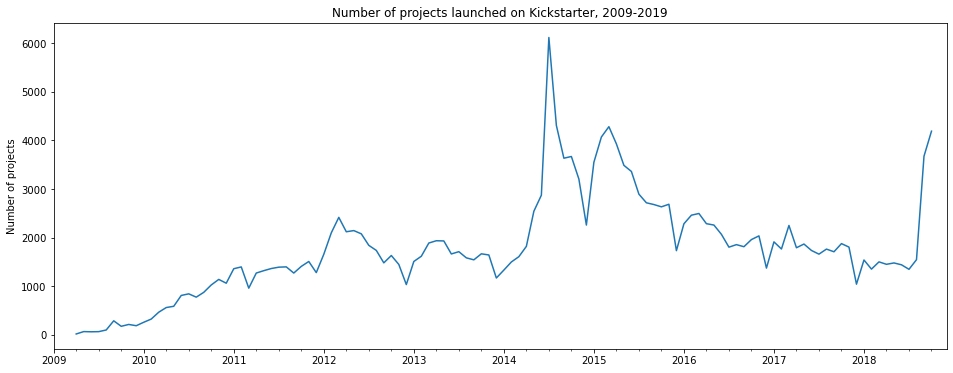

In [29]:
plt.figure(figsize=(16,6))
df['launched_at'] = pd.to_datetime(df['launched_at'])
df.set_index('launched_at').category.resample('M').count().plot() #resampling time series to Months
plt.xlim('2009-01-01', '2018-12-31')
plt.xlabel('')
plt.ylabel('Number of projects')
plt.title('Number of projects launched on Kickstarter, 2009-2019')
plt.show()

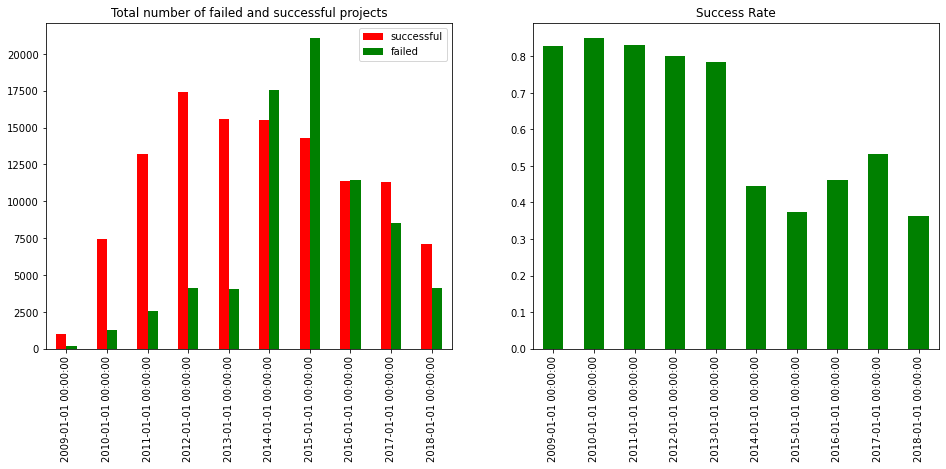

In [30]:
df['launched_at'] = pd.to_datetime(df['launched_at'],format='%Y')
year_df = df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()
year_df1 = year_df[['successful', 'failed']]

fig, ax = plt.subplots(1,2, figsize=(16,6))
year_df1.plot.bar(ax=ax[0], color=['red', 'green'])
ax[0].set_title('Total number of failed and successful projects')
ax[0].set_xlabel('')
year_df1["successful"].div(year_df.sum(axis=1), axis=0).plot(kind='bar', ax=ax[1], color='green') # Normalizes counts across rows
ax[1].set_title('Success Rate')
ax[1].set_xlabel('')
plt.show()

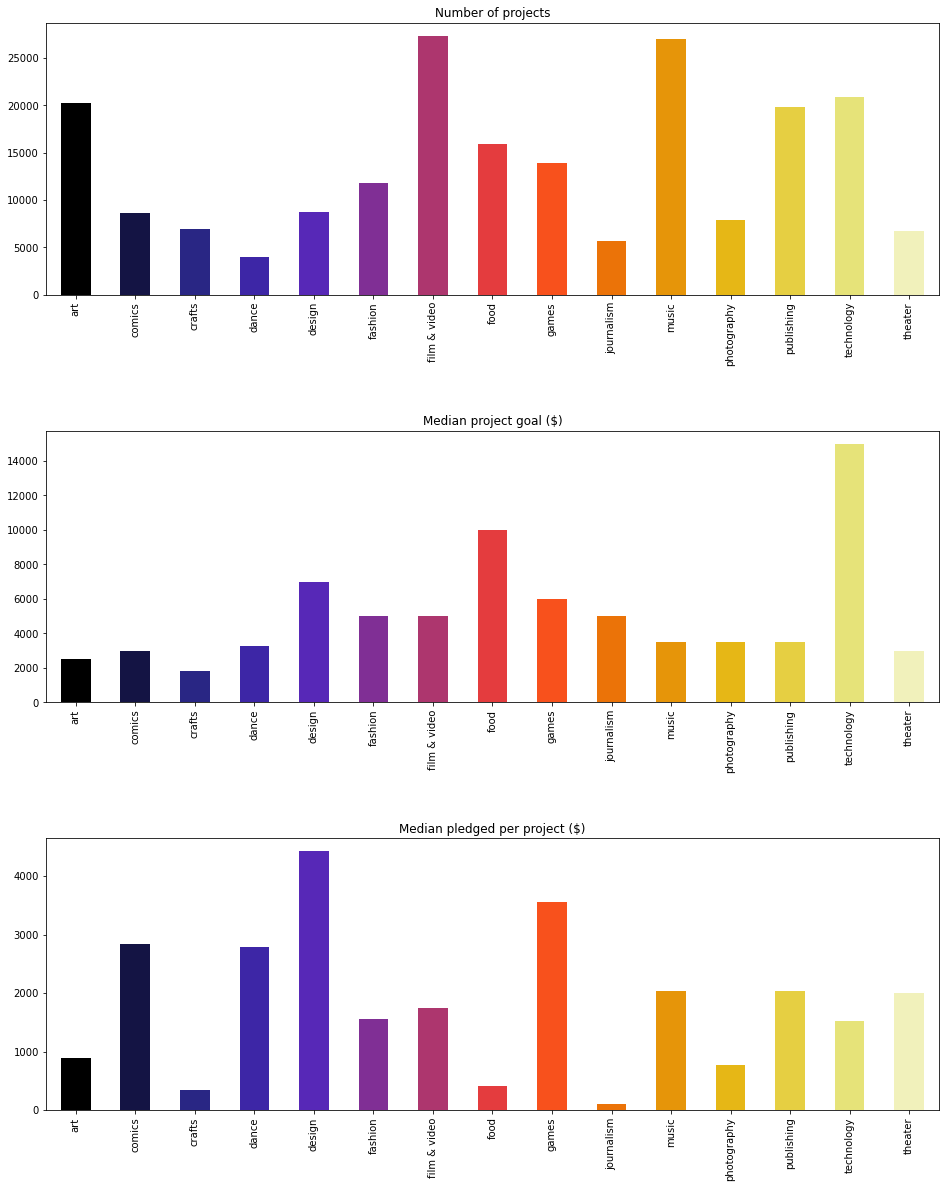

In [31]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(16,20))
color = cm.CMRmap(np.linspace(0, 1, 16,df.category.nunique()))

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.5)
plt.show()

/Users/eugeniasaggioro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eugeniasaggioro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


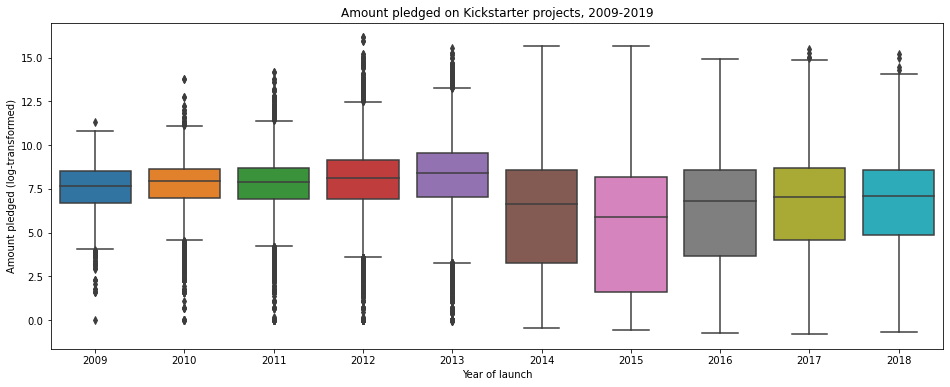

In [32]:
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('Year of launch')
plt.ylabel('Amount pledged (log-transformed)',) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019')
plt.show()

### Prototype model
For our dummy model we train a classification model with several numeric and categorical features of completed projects to get an estimation whether the model would generally be able to predict the success of a project.

Numeric features: 
- Nr of Backers
- Goal

Categorical features:
- Category
- Subcategory
- Country 
- Nation
- spotlight
- staff_pick

Target var: 
- state

In [33]:
#Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [34]:
#Transform dataset
df_dummy=df

df_dummy=df_dummy.loc[df['state'].isin(["failed","successful"])]
df_dummy=df_dummy.loc[df['project_status'].isin(["inactive"])]

#Drop unused columns
del_col=['project_id', 'name', 'slug', 'blurb', 'url', 'subcategory_id', 'creator_id', 'creator_name',
        'city', 'created_at', 'launched_at', 'deadline','pledged', 'currency', 'usd_pledged', 'current_currency',
        'fx_rate', 'static_usd_rate', 'currency_trailing_code', 'usd_type', 'project_status','state_changed_at',
        'disable_communication', 'is_creator_registered','is_starrable']

df_dummy=df_dummy.drop(del_col, axis = 1)

#Transform y to 0:1 
y=df_dummy["state"].replace({'failed' : 0, 'successful': 1})

X=df_dummy
X=X.drop('state', axis = 1)

#Build preprocessor for columns
#Standardize numerical features
numeric_features=["nr_backers", "goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", "spotlight", "staff_pick"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build L2 Logistic Regression 5-fold CV and
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Making predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector as selector

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [37]:
numeric_features=["nr_backers", "goal"]
numeric_transformer = Pipeline(steps =[
    ('selector', DataFrameSelector(numeric_features)),
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", "spotlight", "staff_pick"]
categorical_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(cat_features)),
    ('cat_encoder', OneHotEncoder(handle_unknown="ignore", sparse=False))])

#Column transformer
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, selector(dtype_include=['object','bool']))],
    remainder = 'passthrough', sparse_threshold=0)

In [38]:
#Run Column Transformer
X_trans = preprocessor.fit_transform(X) 

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv = 5, 
                                        solver = "liblinear", 
                                        penalty = "l2", 
                                        random_state = 42))]) 
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['nr_backers',
                                                                                                      'goal'])),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['nr_backers', 'goal']),
                                                 ('cat',
                                             

In [39]:
from sklearn.model_selection import cross_val_predict

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

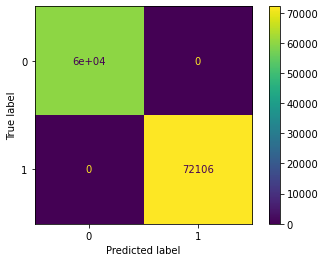

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plot_cf = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
ConfusionMatrixDisplay(plot_cf).plot()

### Evaluation

In [41]:
# Logistic regression scores
print("Logistic regression score for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred))

Logistic regression score for training set: 1.0
Logistic regression score for test set: 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15116
           1       1.00      1.00      1.00     17870

    accuracy                           1.00     32986
   macro avg       1.00      1.00      1.00     32986
weighted avg       1.00      1.00      1.00     32986



In [42]:
df_dummy.dtypes

state           object
category        object
subcategory     object
country         object
nation          object
nr_backers       int64
goal           float64
spotlight         bool
staff_pick        bool
dtype: object